In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 71kB 17.4MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

In [3]:
dict_={'a':[11,21,31],'b':[12,22,32]}

In [4]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [6]:
df.mean()

a    21.0
b    22.0
dtype: float64

In [7]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [8]:
type(bitcoin_data )

dict

In [9]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1627570945276, 39921.797825258],
 [1627574401667, 39945.981398480195],
 [1627578093281, 39765.78033491],
 [1627581668085, 39852.1528877297],
 [1627585221483, 39476.953675657656]]

In [10]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])

In [11]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))


In [12]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})

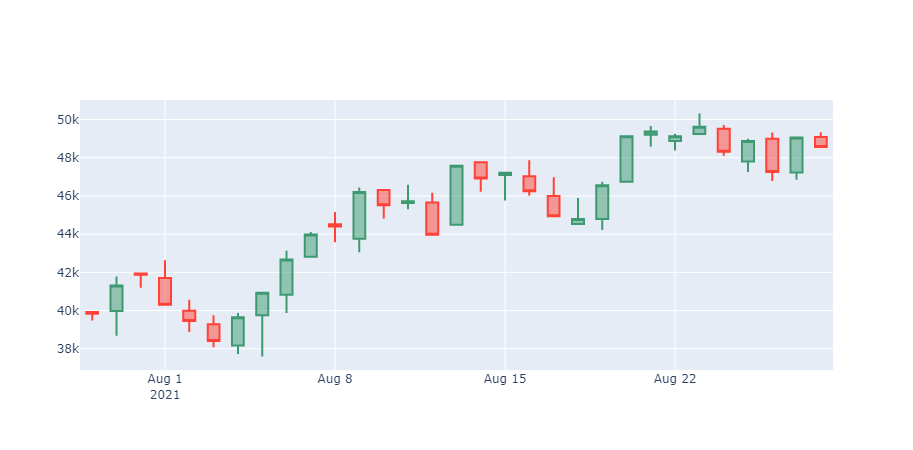

In [14]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()